## Desciption

This model is fairly simple, using the same architecture as CNN_1_3, which we found to be the best. It does not include augmented data, just takes the data from La Fleur's supplemental materials including:
 - La Fleur et al (and De Novo Designs)
 - Urtecho et al
 - Hossain et al
 - Yu et al
 - Lagator (36N, Pl, and Pr)
 - Anderson Series

We onehot encode each basepair and pad the whole sequence. Because we use a CNN which is designed to identify "features," the input promoter can be any length (with padding) and the model will be able to accurately predict the expression.

In [1]:
import CNN_5_0 as parent

2025-04-11 12:36:41.793734: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
name = 'CNN_5_1'

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('../Data/combined/LaFleur_supp.csv')

X = df[['Promoter Sequence']].astype(str).agg(''.join, axis=1)
y = MinMaxScaler().fit_transform(df[['Observed log(TX/Txref)']].abs())

X, max_length = parent.preprocess_sequences(X)

In [4]:
X.shape

(48767, 150, 4)

In [5]:
X_train, X_test, y_train, y_test = parent.train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
##model = parent.build_cnn_model(X.shape[1:])
##history = parent.train_model(model, X_train, y_train, X_test, y_test)
##loss = parent.evaluate_model(model, X_test, y_test)
##parent.save_model(model, name)

1524/1524 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


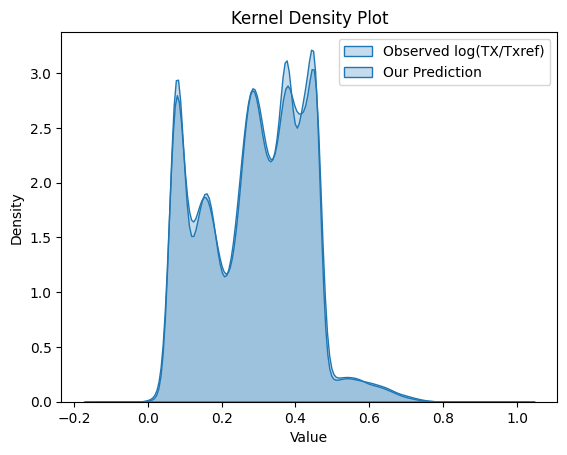

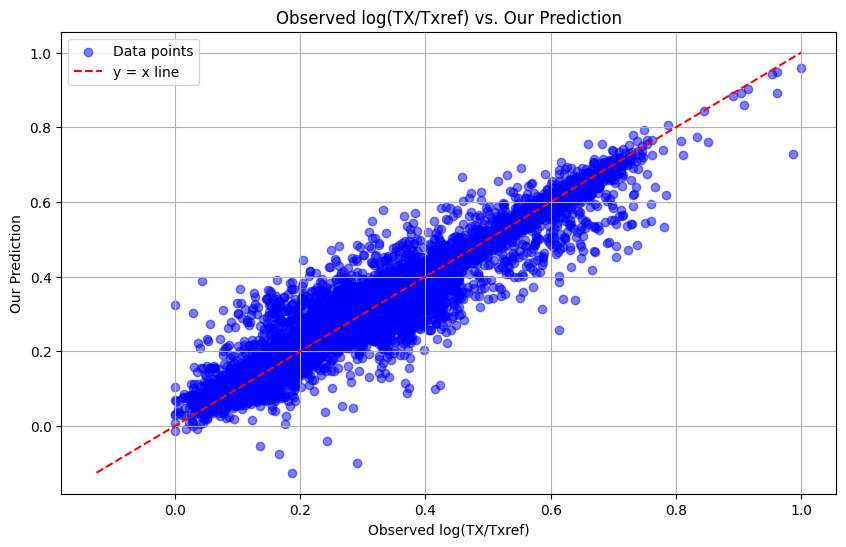

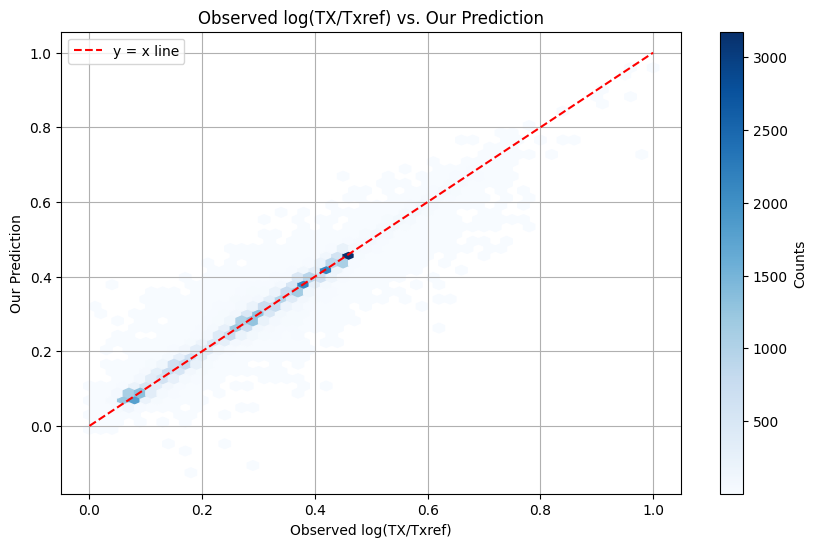

In [7]:
predicted_df = parent.load_and_predict(name, X)
predicted = predicted_df['Value']
observed = y

parent.plot_kde(observed, predicted_df)
parent.plot_scatter(parent.ravel(observed), predicted)
parent.plot_hexbin(parent.ravel(observed), predicted)

305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


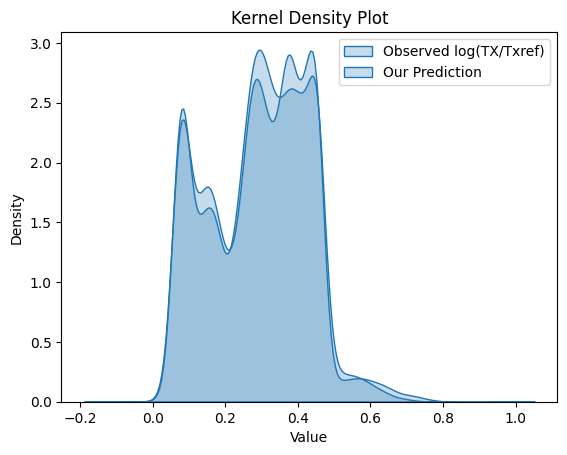

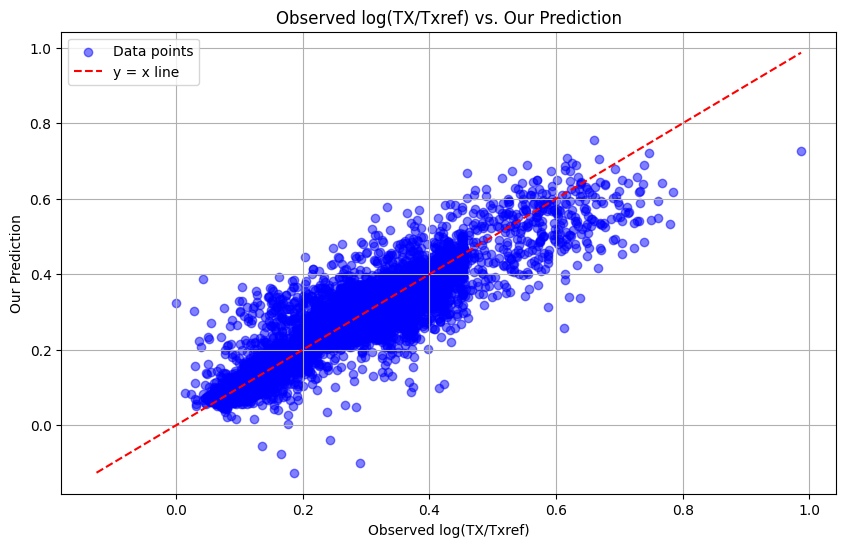

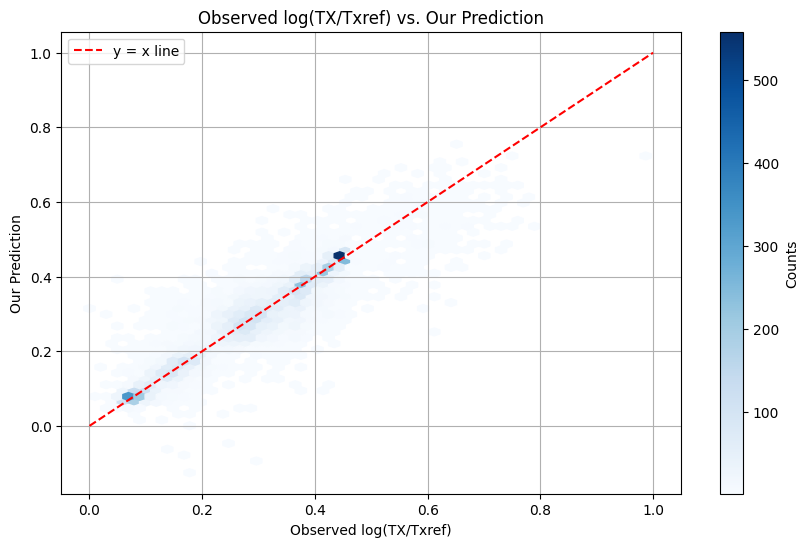

In [9]:
predicted_df = parent.load_and_predict(name, X_test)
predicted = predicted_df['Value']
observed = y_test

parent.plot_kde(observed, predicted_df)
parent.plot_scatter(parent.ravel(observed), predicted)
parent.plot_hexbin(parent.ravel(observed), predicted)

In [10]:
# Load, predict, and evaluate the best model
y_pred = parent.load_and_predict(name, X_test)
mse, rmse, mae, r2 = parent.calc_metrics(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('R2: ', r2)

305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MSE:  0.002396482186567454
RMSE:  0.048953878156561347
MAE:  0.030634852044546614
R2:  0.8730241880038014


In [11]:
from keras.models import Sequential, load_model

model = load_model('../Models/' + name + '.keras')

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 147, 64)        │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 73, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 70, 64)         │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 35, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2240)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       143,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 483,077 (1.84 MB)

 Trainable params: 161,025 (629.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 322,052 (1.23 MB)

In [ ]:
##model.save('../Models/' + name + '.hdf5')